# TECH_OSCAR PREDICTION MODEL

In [100]:
#Import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [101]:
# Load the dataset
file_path = 'data set for oscar.csv'
df = pd.read_csv(file_path)

In [102]:
# Display the first few rows and basic info of the dataset
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    513 non-null    float64
 1   Production expense   513 non-null    float64
 2   Multiplex coverage   513 non-null    float64
 3   Budget               501 non-null    float64
 4   Movie_length         513 non-null    float64
 5   Lead_ Actor_Rating   513 non-null    float64
 6   Lead_Actress_rating  508 non-null    float64
 7   Director_rating      513 non-null    float64
 8   Producer_rating      513 non-null    float64
 9   Critic_rating        511 non-null    float64
 10  Trailer_views        513 non-null    int64  
 11  3D_available         508 non-null    object 
 12  Time_taken           501 non-null    float64
 13  Twitter_hastags      513 non-null    float64
 14  Genre                513 non-null    object 
 15  Avg_age_actors       513 non-null    int

In [104]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values
print("Missing values in each column:")
print(missing_values)

# Display the data types
print("\nData types of each column:")
print(df.dtypes)

Missing values in each column:
Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                 12
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     5
Director_rating         0
Producer_rating         0
Critic_rating           2
Trailer_views           0
3D_available            5
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Tech_Oscar              0
dtype: int64

Data types of each column:
Marketing expense      float64
Production expense     float64
Multiplex coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views            int64
3D_available            object
Time_taken             float64
Twitter_hastags        float64


In [105]:
# Fill missing values with mean for numerical columns
numerical_cols = ['Budget', 'Lead_Actress_rating', 'Critic_rating', 'Time_taken']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
# Fill missing values with mode for categorical column
df['3D_available'].fillna(df['3D_available'].mode()[0], inplace=True)

In [106]:
# Check for missing values after removal os misssing values
missing_values = df.isnull().sum()
# Display the missing values after removal of missing values
print("Missing values in each column a:")
print(missing_values)


Missing values in each column a:
Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           5
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Tech_Oscar             0
dtype: int64


In [107]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['3D_available', 'Genre'])

In [108]:
# Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates before removal: {num_duplicates}")

Number of duplicates before removal: 7


In [109]:
# Remove duplicates
df = df.drop_duplicates()

In [111]:
# Check and print the number of duplicates after removal
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates after removal: {num_duplicates}")

Number of duplicates after removal: 0


In [112]:
#outliers detection

# Select numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

# Interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier step
outlier_step = 1.5 * IQR

# Identify outliers
outliers_iqr = ((df[num_cols] < (Q1 - outlier_step)) | (df[num_cols] > (Q3 + outlier_step))).any(axis=1)

# Count the number of outliers
num_outliers_iqr = outliers_iqr.sum()
print(f'Number of outliers identified using IQR method: {num_outliers_iqr}')


Number of outliers identified using IQR method: 119


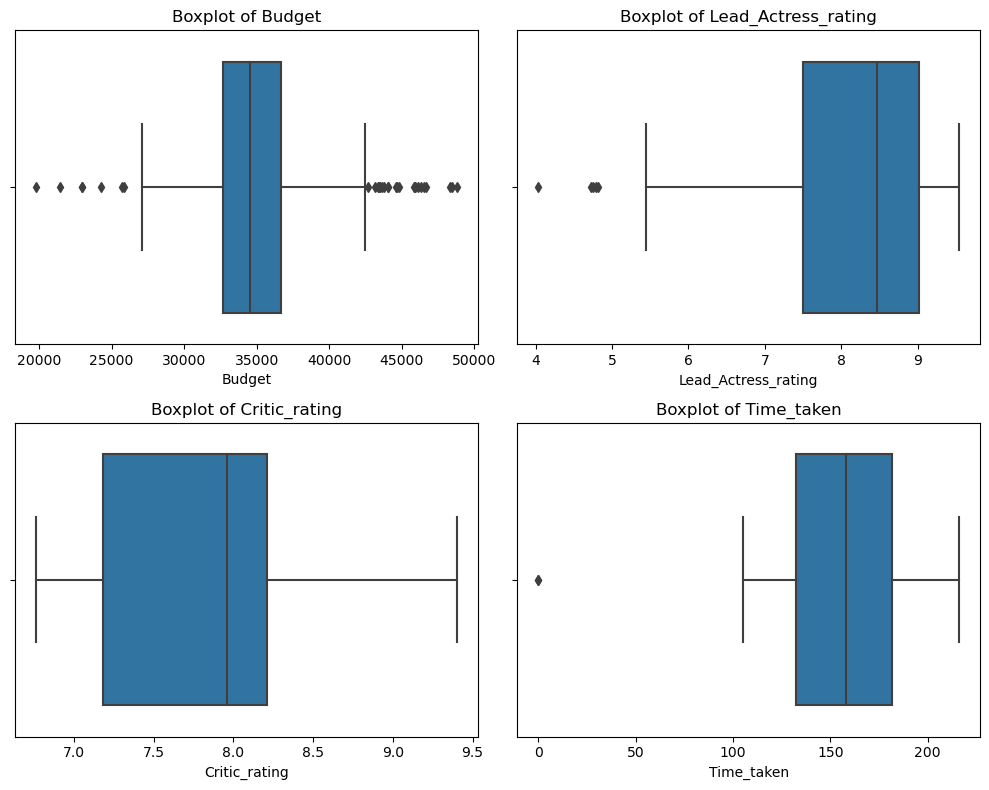

In [113]:
# Handle outliers using IQR method and plot the outliers
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
plt.tight_layout()
plt.show()

In [114]:
# Identify outliers
outliers = ((df[num_cols] < (Q1 - outlier_step)) | (df[num_cols] > (Q3 + outlier_step))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Check for remaining outliers in the cleaned data
Q1_cleaned = df_cleaned[num_cols].quantile(0.25)
Q3_cleaned = df_cleaned[num_cols].quantile(0.75)
IQR_cleaned = Q3_cleaned - Q1_cleaned
outlier_step_cleaned = 1.5 * IQR_cleaned

# Identify remaining outliers
remaining_outliers = ((df_cleaned[num_cols] < (Q1_cleaned - outlier_step_cleaned)) | (df_cleaned[num_cols] > (Q3_cleaned + outlier_step_cleaned))).any(axis=1)

# Count the number of remaining outliers
num_remaining_outliers = remaining_outliers.sum()
print(f'Number of remaining outliers after cleaning using IQR method: {num_remaining_outliers}')

Number of remaining outliers after cleaning using IQR method: 0


In [115]:
# Separate features and target variable
X = df.drop('Tech_Oscar', axis=1)
y = df['Tech_Oscar']

In [116]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [117]:
# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors is the k value

In [118]:
# Train and evaluate the model using cross-validation
cv_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
mean_cv_score = cv_scores.mean()

In [119]:
# Fit the model on the entire dataset
knn.fit(X, y)
y_pred = knn.predict(X)

In [120]:
# Evaluate the model
classification_rep = classification_report(y, y_pred)
accuracy = accuracy_score(y, y_pred)

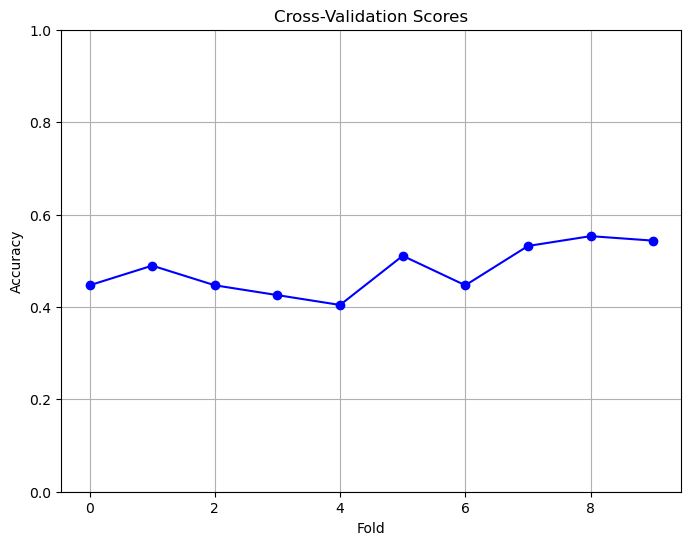

In [121]:
# Plotting cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [122]:
# Plotting confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

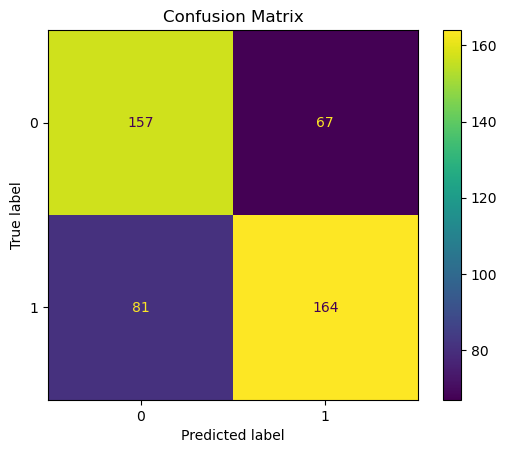

In [123]:
ConfusionMatrixDisplay.from_estimator(knn, X, y)
plt.title('Confusion Matrix')
plt.show()

In [124]:
print("Classification Report:")
print(classification_rep)
print(f"Accuracy: {accuracy:.2f}")
print(f"Cross-Validation Accuracy: {mean_cv_score:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       224
           1       0.71      0.67      0.69       245

    accuracy                           0.68       469
   macro avg       0.68      0.69      0.68       469
weighted avg       0.69      0.68      0.68       469

Accuracy: 0.68
Cross-Validation Accuracy: 0.48


# WITH EXTENDED DATASET

In [75]:
#Import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [76]:
# Load the dataset
file_path = 'extended_data.csv'
df = pd.read_csv(file_path)

In [77]:
# Display the first few rows and basic info of the dataset
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367.0,YES,109.60,223.840,Thriller,23.0,494.0,48000.0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055.0,NO,146.64,243.456,Drama,42.0,462.0,43200.0,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051.0,NO,147.88,2022.400,Comedy,38.0,458.0,69400.0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279.0,YES,185.36,225.344,Drama,45.0,472.0,66800.0,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448.0,NO,176.48,225.792,Drama,55.0,395.0,72400.0,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    613 non-null    float64
 1   Production expense   613 non-null    float64
 2   Multiplex coverage   613 non-null    float64
 3   Budget               601 non-null    float64
 4   Movie_length         613 non-null    float64
 5   Lead_ Actor_Rating   613 non-null    float64
 6   Lead_Actress_rating  608 non-null    float64
 7   Director_rating      613 non-null    float64
 8   Producer_rating      613 non-null    float64
 9   Critic_rating        611 non-null    float64
 10  Trailer_views        613 non-null    float64
 11  3D_available         608 non-null    object 
 12  Time_taken           601 non-null    float64
 13  Twitter_hastags      613 non-null    float64
 14  Genre                613 non-null    object 
 15  Avg_age_actors       613 non-null    flo

In [79]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values
print("Missing values in each column:")
print(missing_values)

# Display the data types
print("\nData types of each column:")
print(df.dtypes)

Missing values in each column:
Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                 12
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     5
Director_rating         0
Producer_rating         0
Critic_rating           2
Trailer_views           0
3D_available            5
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Tech_Oscar              0
dtype: int64

Data types of each column:
Marketing expense      float64
Production expense     float64
Multiplex coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views          float64
3D_available            object
Time_taken             float64
Twitter_hastags        float64


In [80]:
# Fill missing values with mean for numerical columns
numerical_cols = ['Budget', 'Lead_Actress_rating', 'Critic_rating', 'Time_taken']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [81]:
# Fill missing values with mode for categorical column
df['3D_available'].fillna(df['3D_available'].mode()[0], inplace=True)

In [82]:
# Check for missing values after removal os misssing values
missing_values = df.isnull().sum()
# Display the missing values after removal of missing values
print("Missing values in each column a:")
print(missing_values)


Missing values in each column a:
Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Tech_Oscar             0
dtype: int64


In [83]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['3D_available', 'Genre'])

In [84]:
# Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates before removal: {num_duplicates}")

Number of duplicates before removal: 7


In [85]:
# Remove duplicates
df = df.drop_duplicates()

In [86]:
# Check and print the number of duplicates after removal
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates after removal: {num_duplicates}")

Number of duplicates after removal: 0


In [87]:


#outliers detection

# Select numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

# Interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier step
outlier_step = 1.5 * IQR

# Identify outliers
outliers_iqr = ((df[num_cols] < (Q1 - outlier_step)) | (df[num_cols] > (Q3 + outlier_step))).any(axis=1)

# Count the number of outliers
num_outliers_iqr = outliers_iqr.sum()
print(f'Number of outliers identified using IQR method: {num_outliers_iqr}')


Number of outliers identified using IQR method: 255


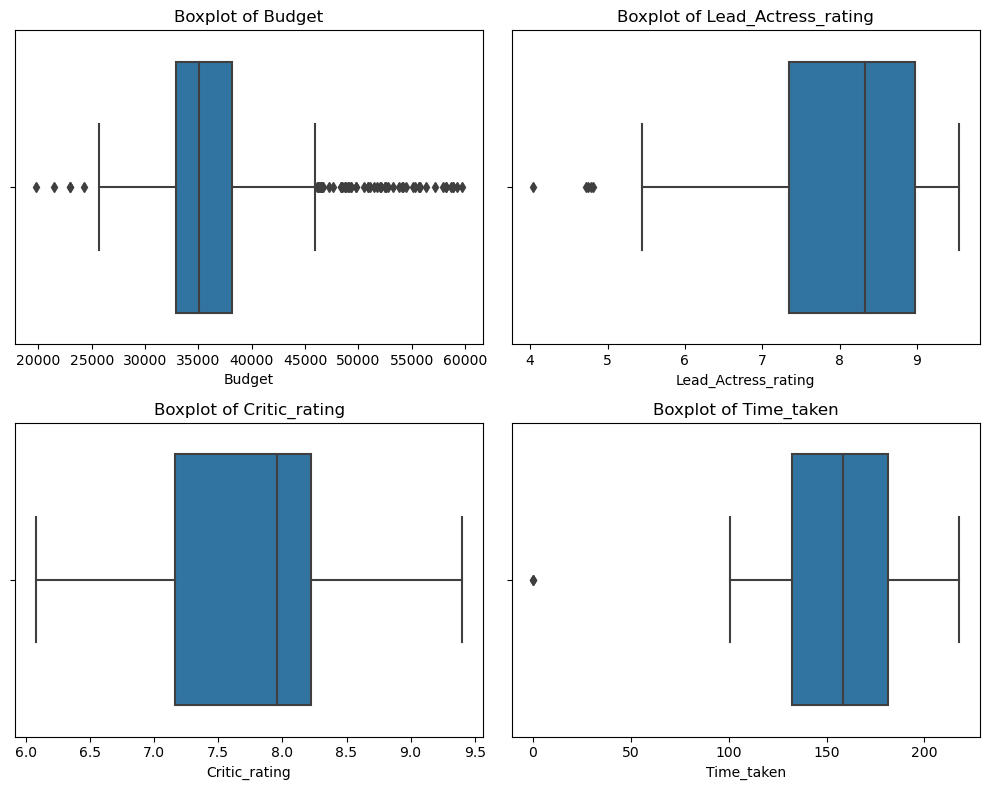

In [88]:
# Handle outliers using IQR method and plot the outliers
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
plt.tight_layout()
plt.show()

In [89]:
# Identify outliers
outliers = ((df[num_cols] < (Q1 - outlier_step)) | (df[num_cols] > (Q3 + outlier_step))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Check for remaining outliers in the cleaned data
Q1_cleaned = df_cleaned[num_cols].quantile(0.25)
Q3_cleaned = df_cleaned[num_cols].quantile(0.75)
IQR_cleaned = Q3_cleaned - Q1_cleaned
outlier_step_cleaned = 1.5 * IQR_cleaned

# Identify remaining outliers
remaining_outliers = ((df_cleaned[num_cols] < (Q1_cleaned - outlier_step_cleaned)) | (df_cleaned[num_cols] > (Q3_cleaned + outlier_step_cleaned))).any(axis=1)

# Count the number of remaining outliers
num_remaining_outliers = remaining_outliers.sum()
print(f'Number of remaining outliers after cleaning using IQR method: {num_remaining_outliers}')

Number of remaining outliers after cleaning using IQR method: 0


In [90]:
# Separate features and target variable
X = df.drop('Tech_Oscar', axis=1)
y = df['Tech_Oscar']

In [91]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [92]:
# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors is the k value

In [93]:
# Train and evaluate the model using cross-validation
cv_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
mean_cv_score = cv_scores.mean()

In [94]:
# Fit the model on the entire dataset
knn.fit(X, y)
y_pred = knn.predict(X)

In [95]:
# Evaluate the model
classification_rep = classification_report(y, y_pred)
accuracy = accuracy_score(y, y_pred)

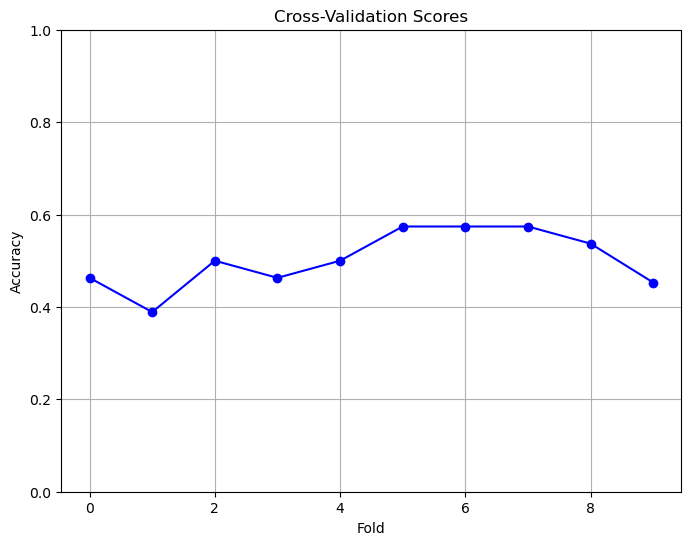

In [96]:
# Plotting cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [97]:
# Plotting confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

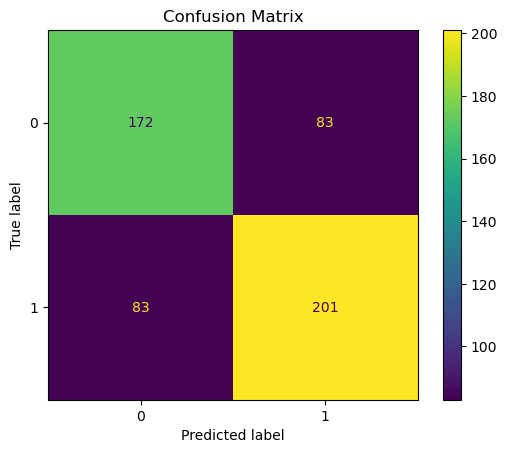

In [98]:
ConfusionMatrixDisplay.from_estimator(knn, X, y)
plt.title('Confusion Matrix')
plt.show()

In [99]:
print("Classification Report:")
print(classification_rep)
print(f"Accuracy: {accuracy:.2f}")
print(f"Cross-Validation Accuracy: {mean_cv_score:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       255
           1       0.71      0.71      0.71       284

    accuracy                           0.69       539
   macro avg       0.69      0.69      0.69       539
weighted avg       0.69      0.69      0.69       539

Accuracy: 0.69
Cross-Validation Accuracy: 0.50
